# Analysis of the Airlines Arrival Delay Causes

## 1)Background of the data


* The dataset is published on the open data souce Kaggle.
* It is collected by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS). They track the on-time performance of domestic flights operated by large air carriers.
* This dataset is only for year 2008.
* Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly air Traval Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website.
* BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made avaiable to the public at the time the Air Travle Consumer Report is released. 
* *The above information is from Kaggle. https://www.kaggle.com/giovamata/airlinedelaycauses*


## 2) Links to the Airlines Arrival Delay Dataset
* Data Introduction: https://www.kaggle.com/giovamata/airlinedelaycauses
* Data Download: https://www.kaggle.com/giovamata/airlinedelaycauses/download

In [116]:
#The direct downloadlink to the Kaggle data set
data_url='https://www.kaggle.com/giovamata/airlinedelaycauses/download'

## 3) Import the eccential modules 

#### Currently, I only need the _pandas_, _numpy_, _matplotlib_ ,and _seaborn_ .
#### The _scikitlearn_ et.al. will be imported later 

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter #To make the y-axis(proportion) shown in percentage
import seaborn as sns
from datetime import datetime
%matplotlib inline

## 4) Import the local dataset
* I've downloaded the dataset in advance to save time;
* The name of the dataset is DelayedFlights.csv

In [118]:
data_airline=pd.read_csv('DelayedFlights.csv')

## 4) Desplay the basic information of the dataset.
* The dataset contains 1936758 rows and 30 columns
* The column names are as listed.
* The meaning of each column can be found on the website http://stat-computing.org/dataexpo/2009/the-data.html
* Here are some need-to-note details of them:
<br>
  DayOfWeek: 1 (Monday) - 7 (Sunday)
<br>
  DepTime:  actual departure time (local, hhmm)
<br>
  CRSDepTime: scheduled departure time (local, hhmm)
<br>
  ArrTime: actual arrival time (local, hhmm)
<br> 
  CRSArrTime: scheduled arrival time (local, hhmm)
<br>  
  ActualElapsedTime: in minutes
<br>  
  CRSElapsedTime: in minutes
<br>  
  AirTime: in minutes
<br>  
  ArrDelay: arrival delay, in minutes
<br>    
  DepDelay: departure delay, in minutes
<br> 
  Distance: in miles
<br> 
  TaxiIn: taxi in time, in minutes
<br> 
  TaxiOut: taxi out time in minutes
<br>
  Cancelled: was the flight cancelled?
<br>
  CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
<br>
  Diverted: 1 = yes, 0 = no
<br>
  CarrierDelay: in minutes
<br>
  WeatherDelay: in minutes
<br>
  NASDelay: in minutes
<br>  
  SecurityDelay: in minutes
<br>
  LateAircraftDelay: in minutes

In [119]:
row_num,col_num=data_airline.shape
print('There are ',row_num,' rows','and ',col_num,'columns.')
list(data_airline.columns)

There are  403571  rows and  30 columns.


['Unnamed: 0',
 'Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

### 4.1) Examples of the dataset.
* Below are **first five rows** of the data, 

In [120]:
data_airline.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225.0,WN,...,4.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000.0,WN,...,5.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750.0,WN,...,3.0,17.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925.0,WN,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110.0,WN,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN


### 4.2) Data type information for each columns.
* Below are the **information summary** about the data type

In [121]:
data_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403571 entries, 0 to 403570
Data columns (total 30 columns):
Unnamed: 0           403571 non-null int64
Year                 403571 non-null int64
Month                403571 non-null int64
DayofMonth           403571 non-null int64
DayOfWeek            403571 non-null int64
DepTime              403571 non-null float64
CRSDepTime           403571 non-null int64
ArrTime              401911 non-null float64
CRSArrTime           403570 non-null float64
UniqueCarrier        403570 non-null object
FlightNum            403570 non-null float64
TailNum              403570 non-null object
ActualElapsedTime    401910 non-null float64
CRSElapsedTime       403492 non-null float64
AirTime              401910 non-null float64
ArrDelay             401910 non-null float64
DepDelay             403570 non-null float64
Origin               403570 non-null object
Dest                 403570 non-null object
Distance             403570 non-null float64
TaxiI

### 4.3) Basic statistical summary for each columns.
* The below form is made from the _describe_ method of the dataframe _data_airline_ 
* It tells us that the dataset only contains the flight information of **year 2008**.  

In [122]:
data_airline.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,4.035710e+05,403571.0,403571.000000,403571.000000,403571.000000,403571.000000,403571.000000,401911.000000,403570.000000,403570.000000,...,403570.000000,401910.000000,403570.000000,403570.0,403570.000000,266750.000000,266750.000000,266750.000000,266750.000000,266750.000000
mean,6.418607e+05,2008.0,1.620842,15.070000,3.914677,1512.958939,1458.933281,1610.468658,1624.286282,2213.118215,...,738.874282,6.672531,17.797919,0.0,0.004113,18.365297,3.723393,13.880165,0.098032,26.522051
std,3.653527e+05,0.0,0.621770,8.748114,1.935133,447.344460,425.000069,538.419932,462.863266,1933.110961,...,550.107789,5.114062,13.301745,0.0,0.064003,41.912857,21.938997,32.406313,1.828209,41.943197
min,0.000000e+00,2008.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,24.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.246625e+05,2008.0,1.000000,7.000000,2.000000,1158.000000,1127.000000,1315.000000,1315.000000,622.000000,...,335.000000,4.000000,10.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.498080e+05,2008.0,2.000000,15.000000,4.000000,1539.000000,1500.000000,1709.000000,1655.000000,1552.000000,...,594.000000,5.000000,14.000000,0.0,0.000000,2.000000,0.000000,1.000000,0.000000,11.000000
75%,9.585075e+05,2008.0,2.000000,22.000000,5.000000,1857.000000,1815.000000,2027.000000,2010.000000,3592.000000,...,978.000000,8.000000,21.000000,0.0,0.000000,20.000000,0.000000,13.000000,0.000000,35.000000
max,1.250803e+06,2008.0,3.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9740.000000,...,4962.000000,189.000000,383.000000,0.0,1.000000,1455.000000,1148.000000,1357.000000,149.000000,1143.000000


## 5) Handle the missing observations for each column of the dataset
* First, check the proportion of the missing values for each column. The column names are listed by descending order of the proportion of the missing obeservations.


In [123]:
#Create a dataframe indicating the proportion of missing values for each column
PropOfMissingValue=pd.DataFrame(np.sum(pd.isnull(data_airline))/row_num,columns=['Proportion of missing value'])
# Display the columns according to descending missing value proportion order
PropOfMissingValue.sort_values(by=['Proportion of missing value'],ascending=False)

,Proportion of missing value
LateAircraftDelay,0.339026
SecurityDelay,0.339026
NASDelay,0.339026
WeatherDelay,0.339026
CarrierDelay,0.339026
ActualElapsedTime,0.004116
TaxiIn,0.004116
AirTime,0.004116
ArrDelay,0.004116
ArrTime,0.004113


* The parameters named _LateAircraftDelay_ , _SecurityDelay_, _NASDelay_, _WeatherDelay_, _CarrierDelay_ contains the largest proprotion of missing values. But this is acceptable,because only the flights which were delayed or canceled contains these five parameters.
* Some values in _ArrTime_, _DepTime_, et.al are also missing, but this may be due to the cancellation of the flights. Thus this is also acceptable. 
* But whether the flight was canceled or diverted or not is critical for the analysis, thus the rows whose _Cancelled_ or _Diverted_ contains missing values will be removed.
* The following is to remove the rows containing missing values in specific columns.

In [109]:
InTorlerantColumn=['Cancelled' ,'Diverted']
#Delete rows whose columns in InTorlerantColumn contain missing values
data_airline = data_airline.dropna(axis=0, subset=InTorlerantColumn)

* Next step: Remeasure the dataset size and the proporiton of the missing value to ensure that all the unrequried datasets are successfully removed. 

In [110]:
row_new,col_new= data_airline.shape
print('The row number changes into ',row_new, 'from ',row_num,' after removing nulls')
#Remeasure the proportion of missing values for each column
PropOfMissingValue=pd.DataFrame(np.sum(pd.isnull(data_airline))/row_num,columns=['Proportion of missing value'])
# ReDisplay the columns according to descending missing value proportion order
PropOfMissingValue.sort_values(by=['Proportion of missing value'],ascending=False)

The row number changes into  116170 from  116171  after removing nulls


,Proportion of missing value
LateAircraftDelay,0.353780
SecurityDelay,0.353780
NASDelay,0.353780
WeatherDelay,0.353780
CarrierDelay,0.353780
ActualElapsedTime,0.002815
TaxiIn,0.002815
AirTime,0.002815
ArrDelay,0.002815
ArrTime,0.002815


## 6) Goal: Build a model to predict the flight state(On-Time/Delayed/Cancelled)
Try to use a supervised methods to predict whether the flight has a high probability of delayed or cancelled in advance.

## 7) Basic statistics of the flight datasets
### 7.1) Step1: Define the flight state: On-Time/ Delayed/Cancelled

#### 7.1.1) The distribution of the raw arrival delay
* Here I think for the travellers, the arrival time to the destination is more important than the departure time. Thus the overal flight delay is mainly based on the arrival time.

Number of advance arrival cases is 10853 
Number of delayed arrival cases is 103401
Propotion of advance arrival cases is 0.09342343117844538 
Propotion of delayed arrival cases is 0.8900834983214255


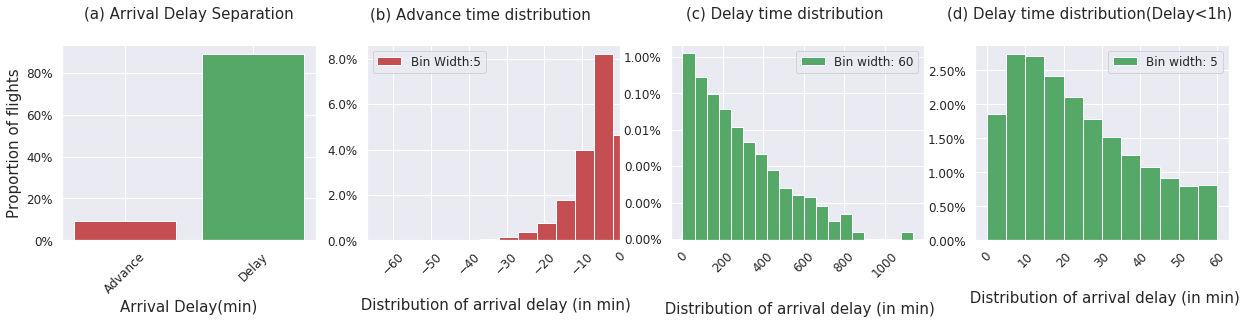

In [111]:
#Load the arrival delay of all the not cancelled flights 
ArrDelay_NotCancelled=data_airline[data_airline.Cancelled==0]['ArrDelay'];

#First measure the proportion of flights iwth arrival delay<0 and the proportion of flights iwth arrival delay>0
NumOfNegativeArrDelay=np.sum(ArrDelay_NotCancelled<0)
NumOfPositiveArrDelay= np.sum(ArrDelay_NotCancelled>0)
PropOfNegativeArrDelay=NumOfNegativeArrDelay/np.size(ArrDelay_NotCancelled)
PropOfPositiveArrDelay=NumOfPositiveArrDelay/np.size(ArrDelay_NotCancelled)
print('Number of advance arrival cases is', NumOfNegativeArrDelay,'\nNumber of delayed arrival cases is',NumOfPositiveArrDelay)
print('Propotion of advance arrival cases is', PropOfNegativeArrDelay,'\nPropotion of delayed arrival cases is',PropOfPositiveArrDelay)

# (a) Make a bar plot of the number of flights arrived in advance   
plt.subplot(1,4,1)
sns.set()
plt.bar([1,2],[PropOfNegativeArrDelay,PropOfPositiveArrDelay],color=['r','g']);
plt.xticks([1,2],['Advance','Delay'],rotation=45,fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel('Arrival Delay(min)',fontsize=15,x=0.5,y=-0.5);
plt.ylabel('Proportion of flights',fontsize=15,x=-10,y=0.5);
plt.subplots_adjust(bottom=0.2) # make room for x-axis labels
plt.title('(a) Arrival Delay Separation',fontsize=15,x=0.5,y=1.1);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)

# (b) Plot the distribution of those flights arrived in advance
AdvanceTime=ArrDelay_NotCancelled[ArrDelay_NotCancelled<0];
Advance_Min=np.min(AdvanceTime)
Bin_Advance=np.arange(Advance_Min,5,5)
plt.subplot(1,4,2)
sns.set()
plt.hist(AdvanceTime,bins=Bin_Advance,density=True, facecolor='r')
plt.xlim([Advance_Min,0])
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\n Distribution of arrival delay (in min)',fontsize=15,x=0.5,y=-0.5)
plt.legend(['Bin Width:5'],fontsize=12)
plt.title('(b) Advance time distribution',fontsize=15,x=0.45,y=1.1)
plt.subplots_adjust(left=-1.8) # make room for yticks 
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# (c) Plot the distribution of those flights arrived delayed 
DelayTime=ArrDelay_NotCancelled[ArrDelay_NotCancelled>0];
Delay_Max=np.max(DelayTime)
Bin_Delay=np.arange(0,Delay_Max+60,60)
plt.subplot(1,4,3)
sns.set()
plt.hist(DelayTime,bins=Bin_Delay,density=True,log=True,facecolor='g',edgecolor='w');
plt.xticks(rotation=45,fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel('\n Distribution of arrival delay (in min)',fontsize=15,x=0.5,y=-0.5);
plt.legend(['Bin width: 60'],fontsize=12);
plt.title('(c) Delay time distribution',fontsize=15,x=0.45,y=1.1);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# (d) Plot the distribution of those flight delayed within one hour
DelayTimeWithinOneHour=DelayTime[DelayTime<60.1]
Bin_Delay_Short=np.arange(0,65,5)
plt.subplot(1,4,4)
sns.set()
plt.hist(DelayTimeWithinOneHour,bins=Bin_Delay_Short,density=True,facecolor='g',edgecolor='w');
plt.xticks(rotation=45,fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel('\n Distribution of arrival delay (in min)',fontsize=15,x=0.5,y=-0.5);
plt.legend(['Bin width: 5'],fontsize=12);
plt.title('(d) Delay time distribution(Delay<1h)',fontsize=15,x=0.45,y=1.1);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))


* According to the above figure
<br>
* **(a)** Among all the flights which were not cancelled, the proportion of advance arrival cases is small, only occupies 9% of the whole cases.
* **(b)** The advanced time is limited, ranging from 35 minutes to 0, with most cases distributed within 15 minutes. This advance distribution around zero can be used as a reference to determin the time period considered as normal on-time.  
* **(c)** The delayed time is widely distributed, while the most frequent cases show a delay within 60 minutes.
* **(d)** To take a detail look at the delay time distribution within one hour, the most cases have a delay within 20minutes.
* **It seems that flgiht arrival delay is quite normal within the rage [-20min to 20min].**
* **But there is one problem, the arrival delay may be related to the full flight duraiton.**
* **For example, if the total flight duration is only one hour, and the arrival delay of half an hour becomes more serious compared to the condition where the total flight duraiton is 4-5 hours.**
* **Therefore, for the next step, I'll first check the relationship between the regular flight duration (_CRSElapsedTime_) and the arrival delay.**
* **Then, the arrival-delay will be normalized by the CRSEElapsedTime.**

#### 7.1.2) The distribution of the arrival delay percentage relative to the whole journey
* As mentioned above, it's more resonable to define the arrival delay of the flight relative to the whole flight duration. It's more unacceptable for longer delays if the flight journel is too short.
* First, take a brief look at the relationship between the CRSElapsedTime and the DelayTime for those uncancelled flights.
* Then, normalize the Arrival Delay by the CRSElapsedTime.

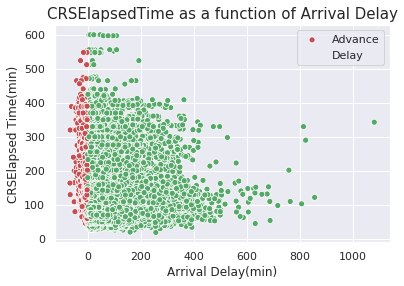

In [112]:
#Load the arrival delay and crselapstime into a dataframe for scatter plot
ExamineArrDelAndCRSElapse=data_airline.loc[data_airline.Cancelled==0,['ArrDelay','CRSElapsedTime']] 
ExamineArrDelAndCRSElapse['DelayIndex']= ExamineArrDelAndCRSElapse['ArrDelay']<0
#Scatterplot
sns.scatterplot(x='ArrDelay', y='CRSElapsedTime', hue='DelayIndex',palette=['g', 'r'],data=ExamineArrDelAndCRSElapse);
plt.legend(['Advance','Delay']);
plt.xlabel('Arrival Delay(min)')
plt.ylabel('CRSElapsed Time(min)')
plt.title('CRSElapsedTime as a function of Arrival Delay',fontsize=15);

* From the above figure, it's apparently that the dots distributed on the right down corner are more severious condition
* Next,normalize the arrival delay by the CRSElapsedTime

In [113]:
# Add a new column called the relative delay to store the relative arrival delay
data_airline['RelativeArrDel']=data_airline['ArrDelay']/data_airline['CRSElapsedTime']
#Replot the distribution of the Relative Arrival Delay again
RelativeArrDel=data_airline[data_airline.Cancelled==0]['RelativeArrDel']

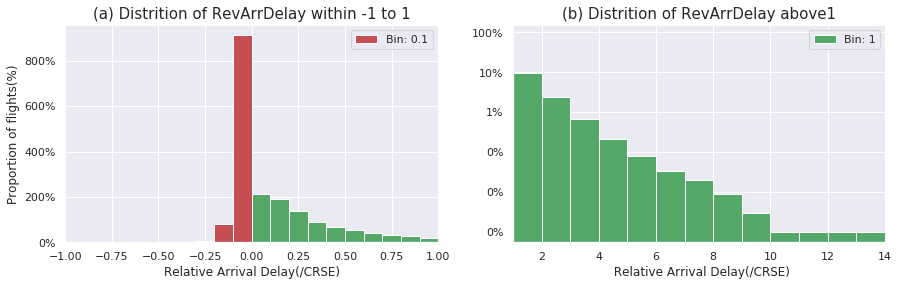

In [114]:
AdvanceTimeRel=RelativeArrDel[ArrDelay_NotCancelled<0];
AdvanceRel_Min=np.min(AdvanceTimeRel)
Bin_Advance=np.arange(AdvanceRel_Min,0.1,0.1)
DelayTimeRel=RelativeArrDel[ArrDelay_NotCancelled>0];
DelayRel_Max=np.max(DelayTimeRel)
Bin_Delay=np.arange(0,DelayRel_Max,0.1)

plt.subplot(1,2,1)
sns.set()
plt.hist(AdvanceTimeRel,bins=Bin_Advance,density=True,facecolor='r',edgecolor='w');
plt.hist(DelayTimeRel,bins=Bin_Delay,density=True,facecolor='g',edgecolor='w');
plt.xlim(-1,1);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.subplots_adjust(left=-1) # make room for yticks 
plt.xlabel('Relative Arrival Delay(/CRSE)');
plt.ylabel('Proportion of flights(%)');
plt.title('(a) Distrition of RevArrDelay within -1 to 1',fontsize=15);
plt.legend(['Bin: 0.1'])
plt.subplot(1,2,2)
sns.set()
Bin_DelayWider=np.arange(0,DelayRel_Max,1)
plt.hist(DelayTimeRel,bins=Bin_DelayWider,density=True,facecolor='g',log=True,edgecolor='w');
plt.xlim(1,DelayRel_Max);
plt.xlabel(' Relative Arrival Delay(/CRSE)');
plt.legend(['Bin: 1'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1));
plt.title('(b) Distrition of RevArrDelay above1',fontsize=15);



* According to (a), it seems that the relative arrival delay differed from zero for around 0.15 can be considered as the normal time delay virability.
* For those "real delayed flights", the relative delay can be as high as 18 times of the scheduled flight time.
* In the following, I'll define the relative arrival delay over 0.15 to be delayed flight, and the others to be on-time flight  

In [115]:
data_airline['FlightState']=data_airline['RelativeArrDel']>0.15 #Assign value 1 to be Delayed flight
data_airline['FlightState']=data_airline['Cancelled']

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?